.pandas is a software library written for the Python programming language for data manipulation and analysis.
.NumPymis a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
.Matplotlib is a plotting library for Python. It is used along with NumPy to provide an environment that is an effective open source alternative for MatLab.
.matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB.
.Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

In [158]:
import pandas as pd
import numpy  as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('seaborn')

preparing data

In [159]:
city_temp=pd.read_csv("../data/raw/temperature.csv", parse_dates=['datetime'])
city_humid=pd.read_csv("../data/raw/humidity.csv",parse_dates=['datetime'])
city_press=pd.read_csv("../data/raw/pressure.csv",parse_dates=['datetime'])
city_speed=pd.read_csv("../data/raw/wind_speed.csv",parse_dates=['datetime'])
city_dir=pd.read_csv("../data/raw/wind_direction.csv",parse_dates=['datetime'])
city_temp.sample(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
3278,2013-02-15 02:00:00,278.88,281.950,285.120,280.590,286.910,285.490,286.840,286.070,274.300,...,273.680,275.820,272.03,272.470,290.930,285.960,286.7495,288.740,288.740,285.96
26547,2015-10-12 15:00:00,284.55,283.450,287.350,283.820,296.750,296.660,294.980,297.750,290.750,...,292.140,290.760,290.89,292.840,300.993,303.870,307.1300,306.210,304.150,303.62
44288,2017-10-20 20:00:00,284.36,284.020,289.240,283.050,294.910,293.540,297.780,301.710,295.660,...,296.060,296.300,290.50,294.000,288.042,297.260,300.1500,299.017,299.017,297.37
25117,2015-08-14 01:00:00,298.94,301.990,298.140,300.260,305.730,300.730,302.610,316.050,303.600,...,293.110,295.390,293.37,293.450,291.485,298.580,304.1500,304.820,300.535,298.73
35332,2016-10-12 16:00:00,281.63,275.338,284.888,275.488,281.588,286.688,283.288,290.388,283.388,...,290.138,290.488,290.63,288.338,300.988,300.188,301.8880,299.888,299.888,292.78


For each city we have timeseries in a column. We are going to chose New York as our chosen city and temperature as our chosen feature. It is better to convert the temperature to Celsius.

In [160]:
data=city_temp[['datetime','New York']]
data=data.rename(columns={'New York':'temperature'})
data.head(5)
data['hour'] = data.datetime.dt.hour
sample = data[:168]

In [162]:
data_humid=city_humid[['datetime','New York']]
data_humid=data_humid.rename(columns={'New York':'humidity'})


In [163]:
city_press.sample(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
41319,2017-06-19 03:00:00,1021.0,1017.0,1011.0,1020.0,1008.0,1009.0,1007.0,1003.0,1017.0,...,1011.0,1010.0,1003.0,1011.0,981.0,1008.0,1008.0,1019.0,1019.0,1008.0
2065,2012-12-26 13:00:00,1012.0,1013.0,1018.0,1011.0,1019.0,1019.0,1022.0,1018.0,1013.0,...,1018.0,1016.0,1022.0,1016.0,989.0,1018.0,1018.0,1013.0,1013.0,994.0
2921,2013-01-31 05:00:00,NaN,1032.0,1026.0,1027.0,1023.0,1023.0,1022.0,1021.0,815.0,...,1018.0,1019.0,NaN,1021.0,967.0,1016.0,1019.0,1016.0,1016.0,990.0
6265,2013-06-19 13:00:00,1014.0,1016.0,1017.0,1014.0,1012.0,1012.0,1008.0,1009.0,1022.0,...,1012.0,1012.0,1013.0,1012.0,983.0,1004.0,1002.0,1013.0,1013.0,985.0
21359,2015-03-10 11:00:00,1029.0,1027.0,1026.0,1029.0,1026.0,1026.0,1029.0,1025.0,1031.0,...,1038.0,1039.0,1035.0,1039.0,1033.0,1033.0,1031.0,1033.0,1033.0,1032.0


In [164]:
data_press=city_press[['datetime','New York']]
data_press=data_press.rename(columns={'New York':'pressure'})
data_press.head(5)

,datetime,pressure
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,1012.0
2,2012-10-01 14:00:00,1012.0
3,2012-10-01 15:00:00,1012.0
4,2012-10-01 16:00:00,1012.0


In [165]:
data_speed=city_speed[['datetime','New York']]
data_speed=data_speed.rename(columns={'New York':'wind_speed'})
data_speed.head(5)

,datetime,wind_speed
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,7.0
2,2012-10-01 14:00:00,7.0
3,2012-10-01 15:00:00,7.0
4,2012-10-01 16:00:00,7.0


In [166]:
data_dir=city_dir[['datetime','New York']]
data_dir=data_dir.rename(columns={'New York':'wind_direction'})
data_dir.head(5)

,datetime,wind_direction
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,260.0
2,2012-10-01 14:00:00,260.0
3,2012-10-01 15:00:00,260.0
4,2012-10-01 16:00:00,260.0


we havesome missing value. All features's tend to be constant from one hour to the next, so we can use backfill to replace any missing values and drop the rest.

In [167]:
data = data.fillna(method = 'bfill', axis=0).dropna()
data_press = data_press.fillna(method = 'bfill', axis=0).dropna()
data_humid = data_humid.fillna(method = 'bfill', axis=0).dropna()
data_dir = data_dir.fillna(method = 'bfill', axis=0).dropna()
data_speed = data_speed.fillna(method = 'bfill', axis=0).dropna()

In [168]:
total_data=pd.concat([data,data_humid['humidity'],data_press['pressure'],data_speed['wind_speed'],data_dir['wind_direction']], axis=1)

In [141]:
total_data.head(5)

,datetime,temperature,hour,humidity,pressure,wind_speed,wind_direction
0,2012-10-01 12:00:00,284.630000,12,76.0,807.0,0.0,0.0
1,2012-10-01 13:00:00,284.630000,13,76.0,807.0,0.0,0.0
2,2012-10-01 14:00:00,284.629041,14,76.0,807.0,0.0,6.0
3,2012-10-01 15:00:00,284.626998,15,76.0,807.0,0.0,20.0
4,2012-10-01 16:00:00,284.624955,16,77.0,807.0,0.0,34.0


There is no missing value and there is no outlayer so our data looks good.

# feature engineering

In [169]:
#convert kelvin to celsios
total_data["temperature"].describe()
total_data["temperature"]=total_data["temperature"] - 273.15

count    44461.000000
mean        12.250469
std         10.220826
min        -22.376000
25%          4.220000
50%         12.720000
75%         20.610000
max         37.090000
Name: temperature, dtype: float64


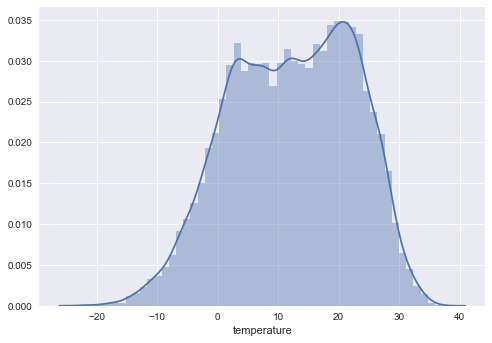

In [170]:
print(total_data.temperature.describe())
plot = sns.distplot(total_data.temperature)

count    44461.000000
mean        66.516790
std         19.884897
min         10.000000
25%         51.000000
50%         68.000000
75%         83.000000
max        100.000000
Name: humidity, dtype: float64


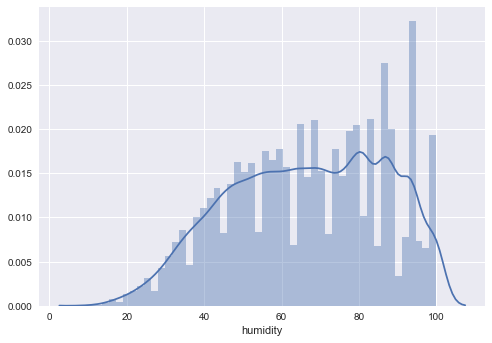

In [171]:
print(total_data.humidity.describe())
plot = sns.distplot(total_data.humidity)

count    44461.000000
mean      1017.021142
std         10.113110
min        959.000000
25%       1012.000000
50%       1017.000000
75%       1023.000000
max       1052.000000
Name: pressure, dtype: float64


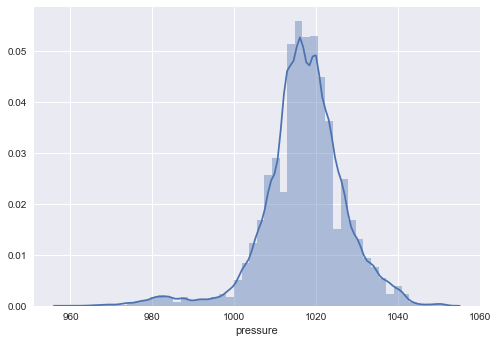

In [172]:
print(total_data.pressure.describe())
plot = sns.distplot(total_data.pressure)

count    44461.000000
mean         3.211039
std          2.189765
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         25.000000
Name: wind_speed, dtype: float64


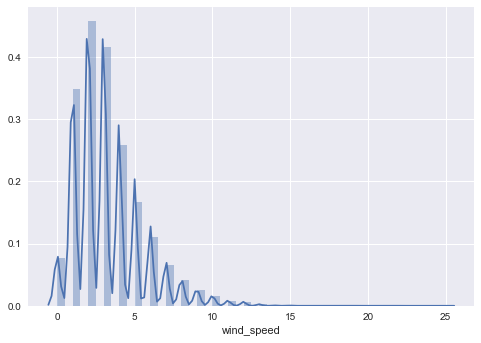

In [173]:
print(total_data.wind_speed.describe())
plot = sns.distplot(total_data.wind_speed)

count    44461.000000
mean       196.251681
std        107.432893
min          0.000000
25%        104.000000
50%        220.000000
75%        289.000000
max        360.000000
Name: wind_direction, dtype: float64


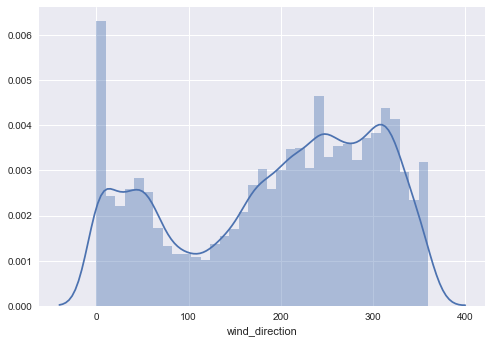

In [174]:
print(total_data.wind_direction.describe())
plot = sns.distplot(total_data.wind_direction)

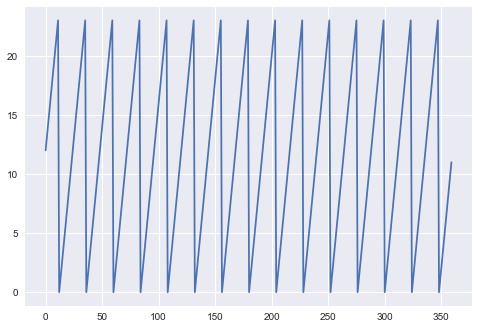

In [175]:
#We are going to extract the hours from the datetime
total_data['hour']=total_data.datetime.dt.hour
# chose a sample aproximatly 15 days
sample=total_data[:360]
sample['hour'].plot()

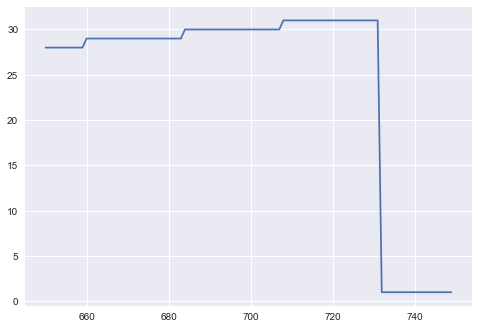

In [176]:
total_data['day']=total_data.datetime.dt.day
sample=total_data[650:750]
sample['day'].plot()

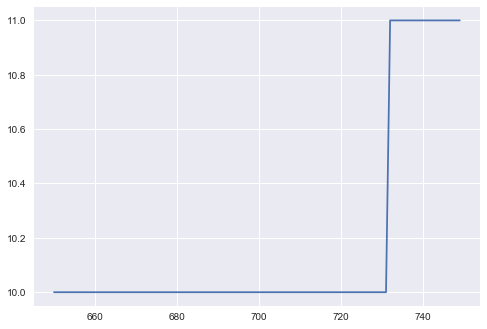

In [177]:
total_data['month']=total_data.datetime.dt.month
sample=total_data[650:750]
sample['month'].plot()

we need to see a cycle betwwn 0 and 23 that repeat 15 times. when the time goes from 23 to 0 we have a jump, so there is a problem about presenting syclical data to machine learnin algorithem. we chose one day to have a look at the time arounf midnight

In [178]:
sample[33:38]

,datetime,temperature,hour,humidity,pressure,wind_speed,wind_direction,day,month
683,2012-10-29 23:00:00,14.09,23,72.0,1006.0,10.0,40.0,29,10
684,2012-10-30 00:00:00,14.09,0,72.0,1006.0,11.0,50.0,30,10
685,2012-10-30 01:00:00,13.95,1,76.0,1006.0,13.0,50.0,30,10
686,2012-10-30 02:00:00,13.82,2,71.0,1005.0,10.0,40.0,30,10
687,2012-10-30 03:00:00,13.44,3,71.0,1005.0,12.0,50.0,30,10


between record 34 and 35 : 23-22=1
between record 35 and 36 : 0-23=-23
so we need to change the encoding of the feature. A common method for encoding cyclical data is to transform the data into two dimensions using a sine and consine transformation.

In [186]:
def cyclical(dataset,column,max_v):
    dataset[column+'_sin']=np.sin(2*np.pi*dataset[column]/max_v)
    dataset[column+'_cos']=np.cos(2*np.pi*dataset[column]/max_v)
    return dataset


In [190]:
total_data.head(5)

,datetime,temperature,hour,humidity,pressure,wind_speed,wind_direction,day,month,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
0,2012-10-01 12:00:00,15.070000,12,58.0,1012.0,7.0,260.0,1,10,-0.136167,-0.990686,0.017213,0.999852,-0.866025,0.5
1,2012-10-01 13:00:00,15.070000,13,58.0,1012.0,7.0,260.0,1,10,-0.398401,-0.917211,0.017213,0.999852,-0.866025,0.5
2,2012-10-01 14:00:00,15.097676,14,57.0,1012.0,7.0,260.0,1,10,-0.631088,-0.775711,0.017213,0.999852,-0.866025,0.5
3,2012-10-01 15:00:00,15.176940,15,57.0,1012.0,7.0,260.0,1,10,-0.816970,-0.576680,0.017213,0.999852,-0.866025,0.5
4,2012-10-01 16:00:00,15.256203,16,57.0,1012.0,7.0,260.0,1,10,-0.942261,-0.334880,0.017213,0.999852,-0.866025,0.5


In [192]:
total_data= cyclical(total_data,'hour',23.0)
total_data= cyclical(total_data,'day',365.0)
total_data= cyclical(total_data,'month',12.0)

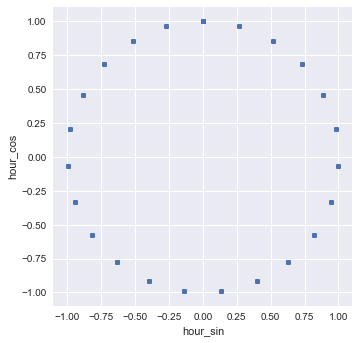

In [193]:
sample.plot.scatter('hour_sin','hour_cos').set_aspect('equal')

now, it is prefect to present as a cyclical feature for machine learning algorithms.

In [182]:
total_data.head(5)

,datetime,temperature,hour,humidity,pressure,wind_speed,wind_direction,day,month,hour_sin,hour_cos
0,2012-10-01 12:00:00,15.070000,12,58.0,1012.0,7.0,260.0,1,10,-0.136167,-0.990686
1,2012-10-01 13:00:00,15.070000,13,58.0,1012.0,7.0,260.0,1,10,-0.398401,-0.917211
2,2012-10-01 14:00:00,15.097676,14,57.0,1012.0,7.0,260.0,1,10,-0.631088,-0.775711
3,2012-10-01 15:00:00,15.176940,15,57.0,1012.0,7.0,260.0,1,10,-0.816970,-0.576680
4,2012-10-01 16:00:00,15.256203,16,57.0,1012.0,7.0,260.0,1,10,-0.942261,-0.334880


In [196]:
total_data.to_csv("New York_hourlyWeather_cyclical.csv.gz",index=False,compression="gzip")

# training and Test
